In [1]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import time
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

from nltk.corpus import stopwords

In [2]:
g1_df = pd.read_json('data/g1.json')

In [3]:
g1_df['text'] = [''.join(sent) for sent in g1_df['text']]

In [4]:
g1_df['len'] = g1_df['text'].apply(len)

In [6]:
n = len(g1_df)
print('before:  ', g1_df.shape)
for i, item in g1_df.iterrows():
    if pd.isnull(item['date']) or item['len'] <= 500:
        g1_df.drop(i, inplace=True)
        
print('after:   ', g1_df.shape)
print('removed: ', n - len(g1_df))

before:   (4346, 4)
after:    (4247, 4)
removed:  99


In [7]:
def date_to_str(dt):
    return dt.date().strftime("%Y-%m-%d")

In [8]:
date_to_str(g1_df['date'][0])

'2019-01-06'

In [9]:
g1_df['date'] = g1_df['date'].apply(date_to_str)

In [10]:
g1_df.head()

,date,text,title,len
0,2019-01-06,O presidente Jair Bolsonaro afirmou neste sáb...,Bolsonaro diz que quer manter estados e municí...,2724
1,2019-01-06,Relator da proposta de reforma da Previdência...,Relator diz que déficit previdenciário de esta...,3706
2,2019-05-31,A Procuradoria Geral da República (PGR) encam...,PGR dá parecer a favor de indulto para ex-diri...,1166
3,2019-05-30,A votação da medida provisória que estabelece...,Senado adia para a próxima segunda-feira votaç...,5166
4,2019-01-06,"O presidente Jair Bolsonaro (PSL) afirmou, em...","A jornal argentino, Bolsonaro diz que Comissão...",1725


In [11]:
print('Quantidade média de caracteres: {}'.format(g1_df['len'].mean()))
print('Maior quantidade de caracteres: {}'.format(g1_df['len'].max()))
print('Menor quantidade de caracteres: {} (desconsiderando os que não tem mensagem)'.format(g1_df[g1_df['len'] != 0]['len'].min()))

Quantidade média de caracteres: 3183.4301860136566
Maior quantidade de caracteres: 138871
Menor quantidade de caracteres: 503 (desconsiderando os que não tem mensagem)


In [12]:
dates = []
for item in g1_df['date']:
    dates.append(str(item)[:4])

    
collections.Counter(dates) 

Counter({'2019': 815, '2018': 1473, '2017': 1826, '2016': 133})

In [13]:
sw = stopwords.words('portuguese')
def limpar_string(frase):
    frase = str(frase)
    frase = frase.lower()
    frase = re.sub(r'-', ' ', frase)
    frase = re.sub(r'<\w+>|\(\w+\)|[^\w\s]|\d|¹|²|³|º|ª', '', frase)
    frase = re.sub(r'\s+', ' ', frase)
    frase = frase.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in frase.split() if word not in sw and len(word) > 2])

In [14]:
g1_df['text'] = g1_df['text'].apply(limpar_string)

In [15]:
collections.Counter([wrd for lst in g1_df['text'] for wrd in lst.split()]).most_common()

[('presidente', 12602),
 ('federal', 7860),
 ('ministro', 7291),
 ('temer', 7186),
 ('governo', 6967),
 ('ser', 6686),
 ('disse', 5913),
 ('nesta', 5895),
 ('sobre', 5760),
 ('câmara', 5571),
 ('afirmou', 5291),
 ('feira', 5229),
 ('segundo', 4586),
 ('ainda', 4389),
 ('tribunal', 4212),
 ('justiça', 4120),
 ('supremo', 3840),
 ('ministério', 3779),
 ('república', 3541),
 ('deputados', 3496),
 ('decisão', 3315),
 ('senado', 3312),
 ('caso', 3308),
 ('bolsonaro', 3283),
 ('brasil', 3267),
 ('deputado', 3160),
 ('após', 3117),
 ('contra', 3112),
 ('geral', 3073),
 ('nacional', 2997),
 ('acordo', 2943),
 ('ter', 2891),
 ('ano', 2891),
 ('proposta', 2808),
 ('projeto', 2726),
 ('anos', 2714),
 ('stf', 2706),
 ('defesa', 2686),
 ('público', 2682),
 ('lei', 2627),
 ('michel', 2611),
 ('vai', 2530),
 ('texto', 2526),
 ('pode', 2500),
 ('reforma', 2473),
 ('quarta', 2458),
 ('terça', 2426),
 ('comissão', 2399),
 ('processo', 2381),
 ('denúncia', 2368),
 ('segunda', 2325),
 ('pedido', 2295),
 (

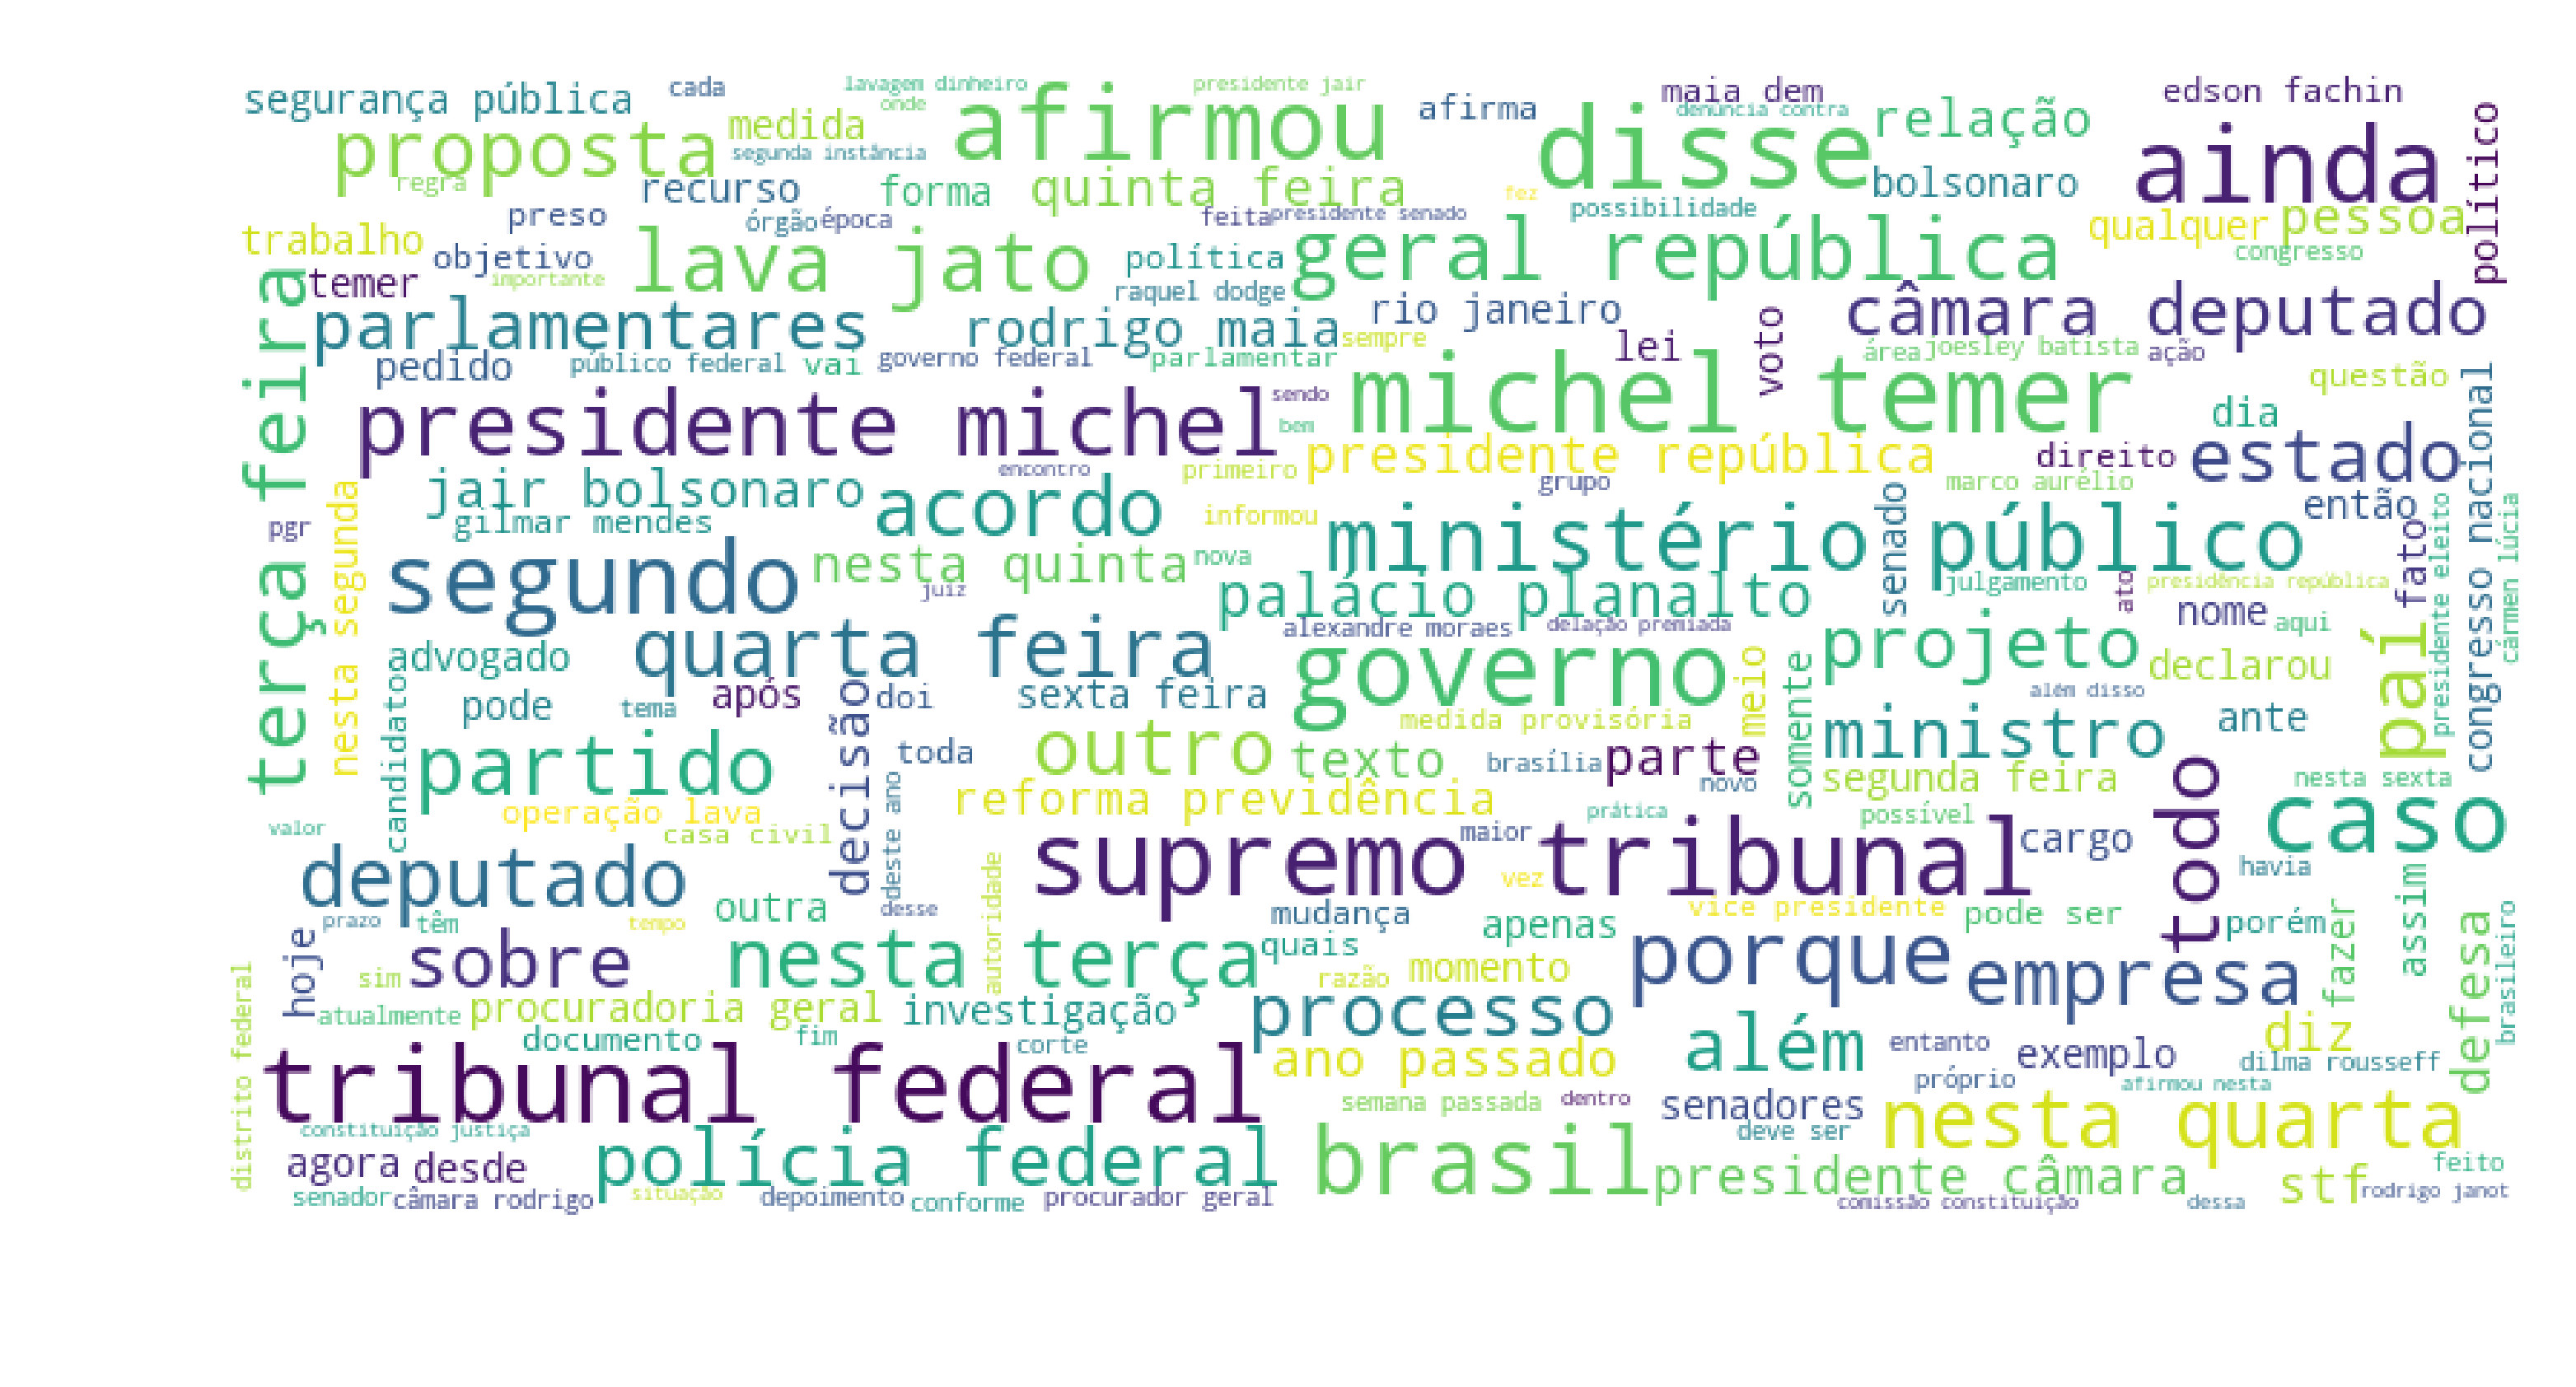

In [16]:
data = [wrd for lst in g1_df['text'][:] for wrd in lst.split()]
wordcloud = WordCloud(
                    background_color='white',
                    max_words=200,
                    max_font_size=40, 
                    random_state=42,
                    height=400,
                    width=800
                    ).generate(' '.join(data))

print(wordcloud)
fig = plt.figure(1, dpi=600)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("plots/word2.png", dpi=900)

In [17]:
g1_df['fake'] = 0

In [18]:
import pickle

pickle.dump(g1_df, open('data/g1_limpo.pkl', 'wb'))